In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahmadrazakashif/bmw-worldwide-sales-records-20102024")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'bmw-worldwide-sales-records-20102024' dataset.
Path to dataset files: /kaggle/input/bmw-worldwide-sales-records-20102024


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv('/kaggle/input/bmw-worldwide-sales-records-20102024/BMW sales data (2010-2024) (1).csv')
data.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [69]:
data.describe()



,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


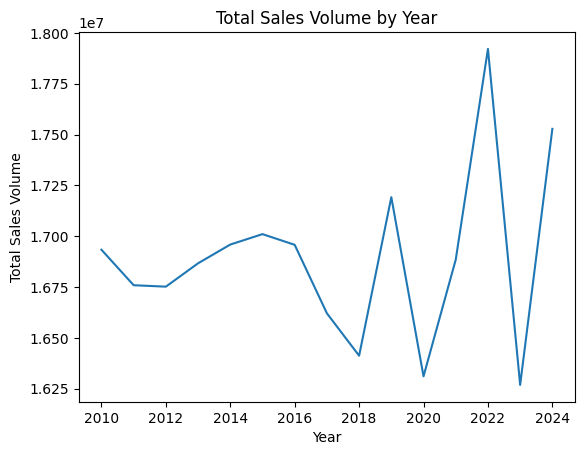

In [29]:
# how were the sales through the years?
# - there were increased sales in 2019, 2022 and 2024
# - While there was a large dip in 2018, 2020, 2023

sales_by_year = data.groupby('Year')['Sales_Volume'].sum().reset_index()

sns.lineplot(x='Year', y='Sales_Volume', data=sales_by_year)
plt.title('Total Sales Volume by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales Volume')
plt.show()

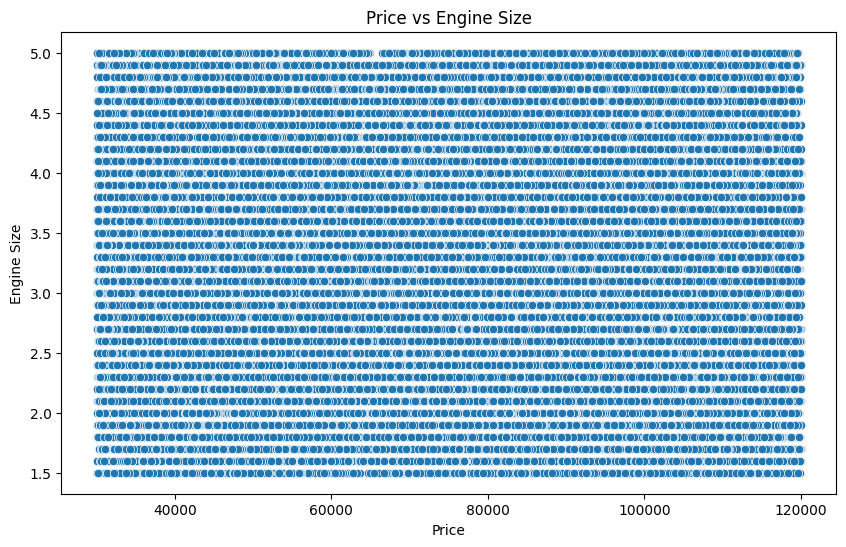

In [42]:
# Is there any relation between price and engine size?
# So we have all sort of engine sizes for all sort of prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price_USD', y='Engine_Size_L', data=data)
plt.title('Price vs Engine Size')
plt.xlabel('Price')
plt.ylabel('Engine Size')
plt.show()

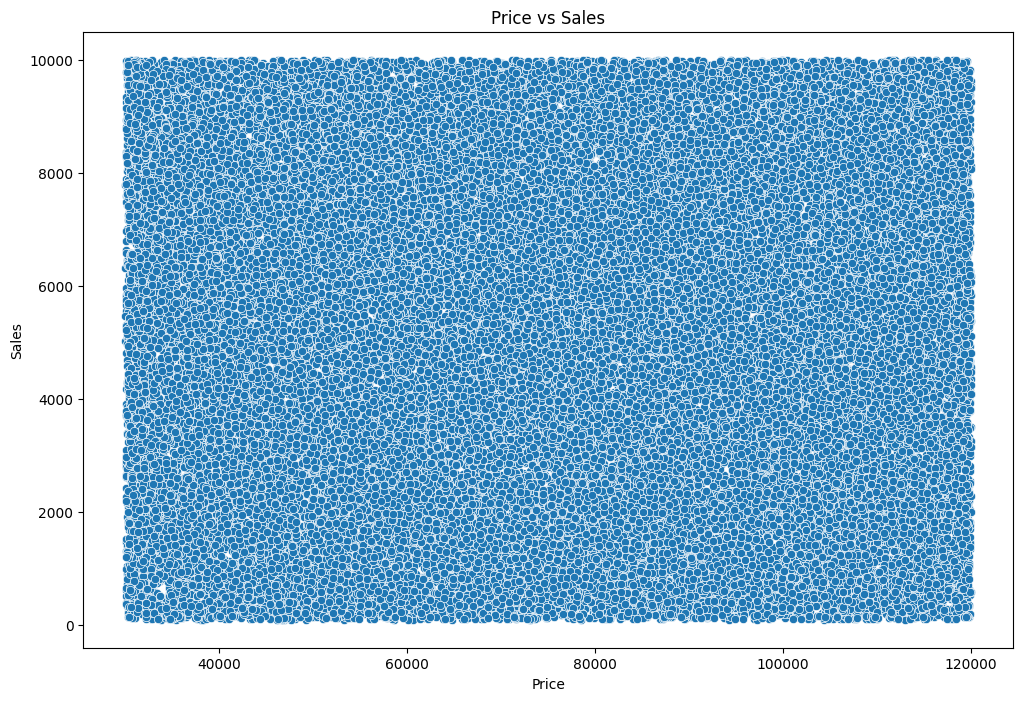

In [56]:
# Is there any relation between price and Sales volume?
# So There doesn't seem to be any relation between just the price and sales on all the models

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Price_USD', y='Sales_Volume', data=data)
plt.title('Price vs Sales')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.show()

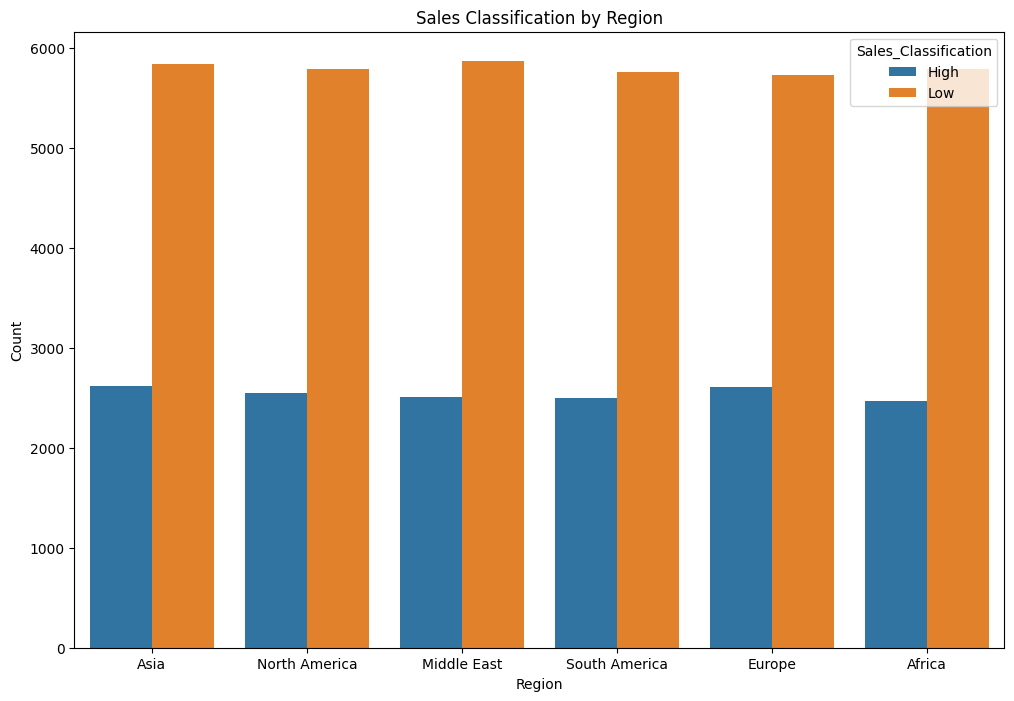

In [71]:
# What is the count of different sales classifications in different regions?
# - The sales of the low and high classification are similar across all the regions
plt.figure(figsize=(12, 8))
sns.countplot(x='Region', hue='Sales_Classification', data=data)
plt.title('Sales Classification by Region') # Added a title for clarity
plt.xlabel('Region')
plt.ylabel('Count') # Changed y-label to Count
plt.show() # Added show to display the plot

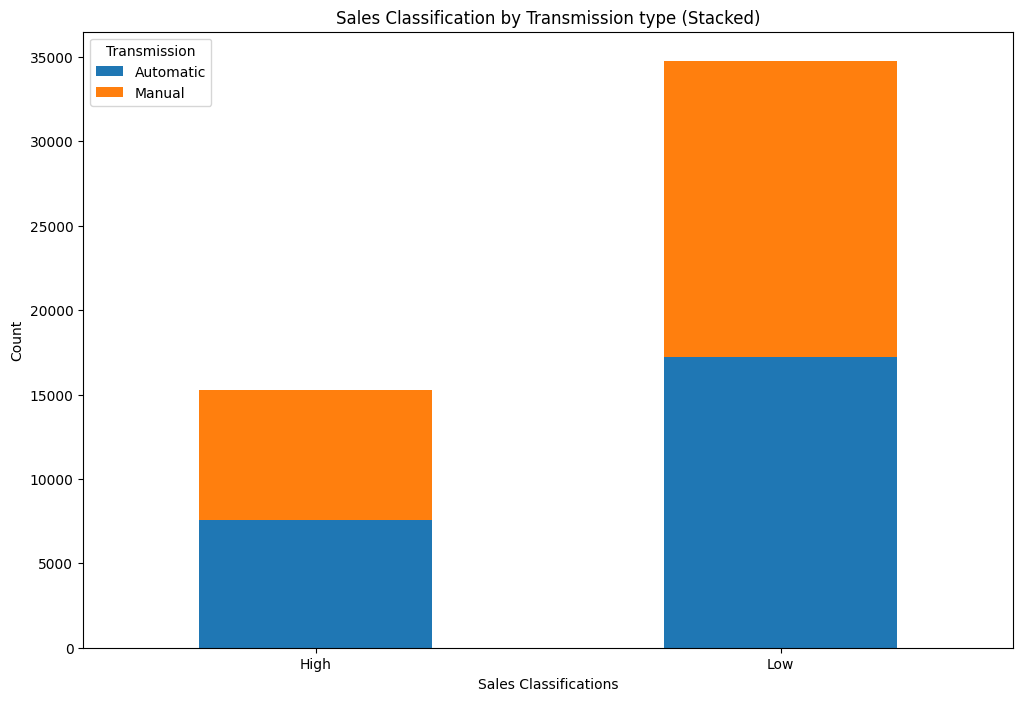

In [80]:
# What is the count of different sales classifications in different transmissions?
# - For both the sales classification similar number of transmission type were sold

pivot_data = data.groupby(['Sales_Classification', 'Transmission']).size().unstack(fill_value=0)

pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Sales Classification by Transmission type (Stacked)')
plt.xlabel('Sales Classifications')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Transmission')
plt.show()

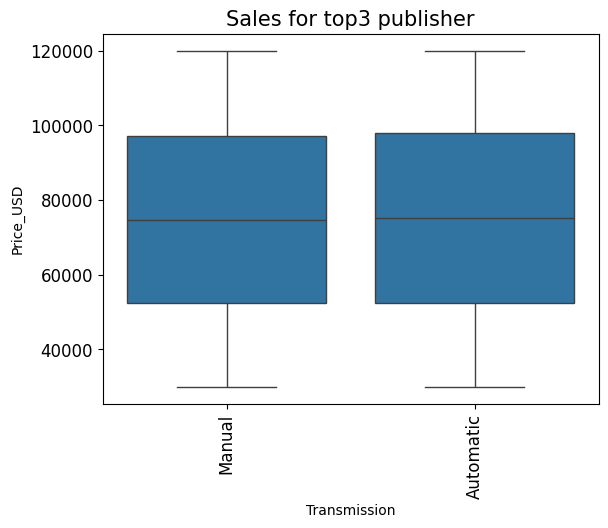

In [85]:
sns.boxplot(x='Transmission', y='Price_USD', data=data)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Sales for top3 publisher', fontsize=15)
plt.show()